(fa-model-2-notebook)=
# Il modello statistico dell'analisi fattoriale 

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
})
options(repr.plot.width=6, repr.plot.height=6)
set.seed(42)


## Modello monofattoriale

Il punto di partenza dell'*analisi fattoriale esplorativa* è
rappresentato da una marice di dimensioni $p \times p$ (dove $p$ è il
numero di variabili osservate) che contiene i coefficienti di
correlazione (o di covarianza) tra le variabili. Il punto di arrivo è
rappresentato da una matrice di dimensioni $p \times k$ (dove $k$) è il
numero di fattori comuni che contiene i coefficienti (le *saturazioni*)
che esprimono la relazione tra i fattori e le variabili osservate.
Considereremo ora il modello matematico dell'analisi fattoriale
esplorativa, con un solo fattore comune, che rappresenta il caso più
semplice.

Con $p$ variabili manifeste $Y_i$, il modello ad un fattore comune può
essere espresso algebricamente nel modo seguente:

$$
Y_i = \mu_i + \lambda_{i} \xi + \delta_i \qquad i=1, \dots, p
$$ 

dove $\xi$ rappresenta il fattore latente, chiamato anche *fattore comune*,
poiché è comune a tutte le $Y_i$, i $\delta_i$ sono invece specifici di
ogni variabile osservata e per tale ragione vengono chiamati *fattori
specifici* o *unici*, e infine i $\lambda_i$ sono detti *saturazioni* (o
*pesi*) fattoriali poiché consentono di valutare il peso del fattore
latente su ciascuna variabile osservata. Si suole assumere per comodità
che $\mu=0$, il che corrisponde a considerare le variabili $Y_i$ come
ottenute dagli scarti dalle medie $\mu_i$ per $i = 1, \dots, p$:

$$
Y_i -\mu_i = \lambda_i \xi + \delta_i.
$$

Si assume che il fattore comune abbia media zero, $\mathbb{E}(\xi)=0$, e
varianza unitaria, $\mathbb{V}(\xi)=1$, che i fattori specifici abbiano media
zero, $\mathbb{E}(\delta_j)=0$, e varianza $\mathbb{V}(\delta_j)=\psi_{i}$, che i
fattori specifici siano incorrelati tra loro, $\mathbb{E}(\delta_i \delta_k)=0$, e che i fattori specifici siano incorrelati con il fattore comune, $\mathbb{E}(\delta_i \xi)=0$.

In questo modello, poiché i fattori specifici sono tra loro incorrelati,
l'interdipendenza tra le variabili manifeste è completamente spiegata
dal fattore comune. Dalle ipotesi precedenti è possibile ricavare la
covarianza tra $Y_i$ e il fattore comune, la varianza della $i$-esima
variabile manifesta $Y_i$ e la covarianza tra due variabili manifeste
$Y_i$ e $Y_k$.

## Covarianza tra un indicatore e il fattore comune

Dal modello monofattoriale è possibile determinare l'espressione della
covarianza teorica tra una variabile manifesta $Y_i$ e il fattore comune
$\xi$: 

$$
Cov(Y_i,\xi)=\mathbb{E}(Y_i \xi)-\mathbb{E}(Y_i)\mathbb{E}(\xi).
$$ 

Dato che $\mathbb{E}(\xi)=0$, possiamo scrivere 

$$
\begin{equation}
\begin{aligned}
  \mbox{Cov}(Y_i,\xi) &= \mathbb{E}(Y_i \xi)=\mathbb{E}[(\lambda_i \xi + \delta_i) \xi]\notag\\
  &=\mathbb{E}(\lambda_i \xi^2 + \delta_i \xi)\notag\\
  &=\lambda_i\underbrace{\mathbb{E}(\xi^2)}_{\mathbb{V}(\xi)=1} + \underbrace{\mathbb{E}(\delta_i \xi)}_{\mbox{Cov}(\delta_i, \xi)=0}\notag\\
  &= \lambda_i.\notag
\end{aligned}
\end{equation}
$$
  
Nel modello a un solo fattore, dunque, la saturazione $\lambda_j$ rappresenta la covarianza la variabile manifesta $Y_i$ e il fattore comune $\xi$ e indica
l'importanza del fattore nel determinare il punteggio osservato. Se le
variabili $Y_i$ sono standardizzate, la saturazione fattoriale
$\lambda_i$ corrisponde alla correlazione tra $Y_i$ e $\xi$.

## Espressione fattoriale della varianza

Nell'ipotesi che le variabili $Y_i$ abbiano media nulla, la varianza di $Y_i$

$$
\begin{equation}
  \mathbb{V}(Y_i) = \mathbb{E}(Y_i^2) -[\mathbb{E}(Y_i)]^2 = \mathbb{E}(Y_i^2)\notag
\end{equation}
$$

è data da

$$
\begin{equation}
\begin{aligned}
  \mathbb{V}(Y_i) &= \mathbb{E}[(\lambda_i \xi + \delta_i)^2 ]\notag\\
  &=\lambda_i^2 \underbrace{\mathbb{E}(\xi^2) }_{\mathbb{V}(\xi)=1} + \underbrace{\mathbb{E}(\delta_i^2) }_{\mathbb{V}(\delta_i)=\psi_{i}} + 2\lambda_i \underbrace{\mathbb{E}(\xi \delta_i) }_{\mbox{Cov}(\xi, \delta_{i})=0}\notag\\
  &=\lambda^2_i + \psi_{i}.
\end{aligned}
\end{equation}
$$

La quantità $\lambda^2_i$ è denominata *comunalità* della $i$-esima variabile
manifesta e corrisponde alla quota della varianza della $Y_i$ spiegata
dal fattore comune. Di conseguenza $\psi_{i}$ è la parte residua della
varianza di $Y_i$ non spiegata dal fattore comune ed è denominata
*unicità* di $Y_i$. Nel caso di variabili standardizzate, l'unicità
diventa uguale a 

$$
\psi_{i}=1-\lambda^2_i.
$$ 

In definitiva, la varianza totale di una variabile osservata può essere divisa in una quota che ciascuna variabile condivide con le altre variabili ed è spiegata dal
fattore comune (questa quota è chiamata *comunalità* ed è uguale uguale
al quadrato della saturazione della variabile osservata nel fattore
comune, ovvero $h^2_i = \lambda_i^2$), e in una quota che è spiegata dal
fattore specifico (questa parte è chiamata *unicità* ed è
uguale a $u_i = \psi_{i}$).

**Esempio.** Riprendiamo l'analisi della matrice di correlazioni di Spearman.
Nell'output prodotto dalla funzione `factanal()` viene riportata la
quantità denominata `SS loadings`. Tale quantità indica la porzione della varianza totale delle 4 variabili manifeste che viene spiegata dal fattore comune. Ciascuna variabile
standardizzata contribuisce con un'unità di varianza; nel caso presente,
dunque la varianza totale è uguale a 4. Si ricordi che, nella statistica multivariata, per *varianza totale* si intende la somma delle varianze delle variabili manifeste (nel linguaggio dell'algebra matriciale questa quantità corrisponde alla *traccia* della matrice di covarianze). La quota della varianza totale spiegata dal modello, invece, è data dalla somma delle comunalità delle quattro variabili, ovvero dalla somma delle saturazioni fattoriali innalzate al quadrato.

In [2]:
Spearman <- matrix(c(
  1.0, .78, .70, .66,
  .78, 1.0, .64, .54,
  .70, .64, 1.0, .45,
  .66, .54, .45, 1.0
),
byrow = TRUE, ncol = 4
)
rownames(Spearman) <- c("C", "E", "M", "P")
colnames(Spearman) <- c("C", "E", "M", "P")
Spearman |>
  print()

     C    E    M    P
C 1.00 0.78 0.70 0.66
E 0.78 1.00 0.64 0.54
M 0.70 0.64 1.00 0.45
P 0.66 0.54 0.45 1.00


Eseguiamo l'analisi fattoriale:

In [3]:
fm <- factanal(covmat = Spearman, factors = 1)
fm |>
    print()


Call:
factanal(factors = 1, covmat = Spearman)

Uniquenesses:
    C     E     M     P 
0.086 0.329 0.460 0.539 

Loadings:
  Factor1
C 0.956  
E 0.819  
M 0.735  
P 0.679  

               Factor1
SS loadings      2.587
Proportion Var   0.647

The degrees of freedom for the model is 2 and the fit was 0.023 


Le saturazioni fattoriali sono:

In [4]:
L <- c(fm$load[1], fm$load[2], fm$load[3], fm$load[4])
print(L)

[1] 0.9562592 0.8193902 0.7350316 0.6790212


Facendo il prodotto interno otteniamo:

In [5]:
t(L) %*% L 

2.587173


In termini proporzionali, la quota della varianza totale delle variabile manifeste che viene spiegata dal modello ad un fattore comune è dunque uguale a $2.587 / 4 = 0.647$. Questa quantità è indicata nell'output con la denominazione `Proportion Var`.

Si dice unicità (*uniqueness*) la quota della varianza della variabile considerata che non viene spiegata dalla soluzione fattoriale:

In [6]:
round(fm$uniqueness, 3) |>
    print()

    C     E     M     P 
0.086 0.329 0.460 0.539 


La comunalità (ovvero, la quota di varianza di ciascuna variabile manifesta che viene spiegata dal fattore comune) può essere trovata come:

In [7]:
round(1 - fm$uniqueness, 3) |>
    print()

    C     E     M     P 
0.914 0.671 0.540 0.461 


oppure con

In [8]:
L^2 |>
    print()

[1] 0.9144316 0.6714003 0.5402714 0.4610697


## Covarianza tra due variabili manifeste

Nell'ipotesi che le variabili $Y_i$ abbiano media nulla, la covarianza
tra $Y_i$ e $Y_k$

$$
Cov(Y_i, Y_k)=\mathbb{E}(Y_i Y_k) -
\mathbb{E}(Y_i)\mathbb{E}(Y_k)=\mathbb{E}(Y_i Y_k)
$$

è uguale al prodotto delle corrispondenti saturazioni fattoriali:

$$
\begin{equation}
\begin{aligned}
 \mbox{Cov}(Y_i, Y_k) &= \mathbb{E}(Y_i Y_k) \notag\\
  & =\mathbb{E}[(\lambda_i \xi + \delta_i)(\lambda_k \xi +  \delta_k)]\notag\\
  &=\mathbb{E}(\lambda_i\lambda_k\xi^2 + \lambda_i  \xi \delta_k + \lambda_k \delta_i \xi + \delta_i \delta_k)\notag\\
  &=\lambda_i\lambda_k\underbrace{\mathbb{E}(\xi^2)}_{\mathbb{V}(\xi)=1}+\lambda_i\underbrace{\mathbb{E}(\xi \delta_k)}_{\mbox{Cov}(\xi, \delta_k) =0}+\notag\\ \;&+\lambda_k\underbrace{\mathbb{E}(\delta_i \xi)}_{\mbox{Cov}(\delta_i, \xi) =0} +\underbrace{\mathbb{E}(\delta_i \delta_k)}_{\mbox{Cov}(\delta_i, \delta_k)=0}\notag\\
  &=\lambda_i\lambda_k.
\end{aligned}
\end{equation}
$$

## Correlazioni osservate e correlazioni riprodotte dal modello

In generale possiamo affermare che il modello monofattoriale è adeguato
se si verifica che $\mbox{Cov}(Y_i, Y_k \mid \xi) = 0$
($i, k = 1, \dots,p; \; i\neq k$), ossia se il fattore comune spiega
tutta la covarianza tra le variabili osservate. La matrice di
correlazioni riprodotte dal modello è chiamata $\boldsymbol{\Sigma}$ e
può essere espressa come:

$$
\boldsymbol{\Sigma} = \boldsymbol{\Lambda} \boldsymbol{\Lambda}^\prime + \boldsymbol{\Psi}
$$

In altri termini, il modello monofattoriale è adeguato se è nulla la
differenza tra la matrice di correlazioni osservate e la matrice di
correlazioni riprodotte dal modello. Per i dati di Spearman, le
correlazioni riprodotte dal modello ad un fattore sono

In [9]:
round( L %*% t(L) + diag(fm$uniq), 3) |>
    print()

      [,1]  [,2]  [,3]  [,4]
[1,] 1.000 0.784 0.703 0.649
[2,] 0.784 1.000 0.602 0.556
[3,] 0.703 0.602 1.000 0.499
[4,] 0.649 0.556 0.499 1.000


La matrice delle differenze tra le correlazioni campionarie e quelle
riprodotte è

In [10]:
round(Spearman - (L %*% t(L) + diag(fm$uniq)), 3) |>
    print()

       C      E      M      P
C  0.000 -0.004 -0.003  0.011
E -0.004  0.000  0.038 -0.016
M -0.003  0.038  0.000 -0.049
P  0.011 -0.016 -0.049  0.000


Lo scarto maggiore tra le correlazioni campionarie e quelle riprodotte è
uguale a 0.049. Si può dunque concludere che il modello monofattoriale
spiega in maniera ragionevole i dati di Spearman.

## Bontà di adattamento del modello ai dati

La verifica della bontà di adattamento del modello ai dati si determina
mediante un test statistico che valuta la differenza tra la matrice di
correlazioni (o di covarianze) osservata e la matrice di correlazioni (o
covarianze) predetta dal modello fattoriale. L'ipotesi nulla che viene
valutata è che la matrice delle correlazioni residue sia dovuta
semplicemente agli errori di campionamento, ovvero che la matrice di
correlazioni predetta dal modello $\boldsymbol{\Sigma}(\theta)$ sia
uguale alla matrice di correlazioni $\boldsymbol{\Sigma}$ nella
popolazione.

La statistica test $v$ è una funzione della differenza tra la matrice
riprodotta $\boldsymbol{S}(\theta)$ e quella osservata $\boldsymbol{S}$

$$
v = f\left[\boldsymbol{S}(\theta) - \boldsymbol{S}\right]
$$

e si distribuisce come una $\chi^2$ con $\nu$ gradi di libertà

$$
\nu = p(p+1)/ 2 - q,
$$

dove $p$ è il numero di variabili manifeste e
$q$ è il numero di parametri stimati dal modello fattoriale (ovvero,
$\lambda$ e $\psi$). 

La statistica $v$ assume valore 0 se i parametri del modello riproducono esattamente la matrice di correlazioni tra le variabili nella popolazione. Tanto maggiore è la statistica $v$ tanto maggiore è la discrepanza tra le correlazioni osservate e quelle
predette dal modello fattoriale. 

Un risultato statisticamente significativo (es., $p$ \< .05) -- il quale suggerisce che una tale differenza *non* è uguale a zero -- rivela dunque una discrepanza tra il modello e i dati. Il test del modello fattoriale mediante la statistica $\chi^2$
segue dunque una logica diversa da quella utilizzata nei normali test di
ipotesi statistiche: *un risultato statisticamente significativo indica una mancanza di adattamento del modello ai dati*.

L'applicazione del test $\chi^2$ per valutare la bontà di adattamento del modello ai dati richiede che ciascuna variabile manifesta sia distribuita normalmente -- più precisamente, richiede che le variabili manifeste siano un campione casuale che deriva da una normale
multivariata. Questo requisito non è facile da rispettare in pratica.

Tuttavia, il limite principale della statistica $\chi^2$ è che essa dipende fortemente dalle dimensioni del campione: al crescere delle dimensioni campionarie è più facile ottenere un risultato statisticamente significativo (ovvero, concludere che vi è un cattivo adattamento del modello ai dati). Per questa ragione, la bontà di adattamento del modello ai dati viene valutata da molteplici indici, non soltanto dalla statistica $\chi^2$. Più comune è calcolare il rapporto $\chi^2 / \nu$ e usare tale rapporto per valutare la bontà dell'adattamento. Valori minori di 3 o 4 suggeriscono che il modello ben si adatta ai dati.

## L'errore standard della misurazione e il modello fattoriale

Per concludere, prendiamo nuovamente in esame la nozione dell'errore standard della misurazione, uno dei concetti centrali della CTT, e vediamo come tale concetto possa essere "ripensato" in riferimento al modello statistico dell'analisi fattoriale. Iniziamo con una dimostrazione.

````{prf:proof}

Secondo la CTT, il punteggio $X$ ottenuto dalla somministrazione del test è uguale a $X = T + E,$ dove $E$ è una variabile aleatorie indipendente da $T$. Se consideriamo il rispondente $i$-esimo, il modello diventa $X_i = T_i + E_i$, dove $T_i$ è il valore
vero ed $E_i$ è una variabile aleatoria con media 0.

Riscriviamo ora questa equazione nei termini di un modello monofattoriale con $p$ variabili manifeste (item). Per ciascun item avremo:

$$
\begin{equation}
\begin{aligned}
 Y_{1i} &=  \lambda_1 \xi_i + \delta_{1i} \notag\\
 Y_{2i} &=  \lambda_2 \xi_i + \delta_{2i} \notag\\
  \dots\notag\\
 Y_{pi} &=  \lambda_p \xi_i + \delta_{pi} \notag
 \end{aligned}
 \end{equation}
 $$

Il punteggio totale $X_i$ per il rispondente $i$-esimo è dato dalla somma
dei punteggi osservati in ciascun item, ovvero

$$
\begin{equation}
\begin{aligned}
 X_i &= \sum_{j=1}^p Y_{ji} = \sum_{j=1}^p \lambda_j \xi_i + \sum_{j=1}^p \delta_{ji}\notag\\[12pt]
  &=  \left( \sum_{j=1}^p \lambda_j \right) \xi_i  +  \sum_{j=1}^p \delta_{ji} \notag\\[12pt]
  &= T_i + E_i\notag
\end{aligned}
\end{equation}
$$

Secondo la CTT, la varianza del punteggio osservato $X_i$ si scompone in
due componenti: $\sigma^2_{X_i} = \sigma^2_{T_i} + \sigma^2_{E_i}$. Nei
termini del modello fattoriale, la varianza della componente vera del
punteggio totale del test, $\sigma^2_{T_i}$, è data dal quadrato della
somma delle satutazioni fattoriali:

$$
\begin{equation}
\begin{aligned}
 \sigma^2_{T_i} &= \mathbb{V}\left[ \left( \sum_{j=1}^p \lambda_j \right) \xi_i \right]\notag\\
 &= \left( \sum_{j=1}^p \lambda_j \right)^2 \mathbb{V}(\xi_i)\notag\\
 &= \left( \sum_{j=1}^p \lambda_j \right)^2 \notag
\end{aligned}
\end{equation}
$$

Nei termini del modello fattoriale, se consideriamo il punteggio totale
del test, la varianza della componente dell'errore della misurazione,
$\sigma^2_{E_i}$, è data dalla somma delle unicità:

$$
\begin{equation}
\begin{aligned}
 \sigma^2_{E_i} &= \mathbb{V}\left( \sum_{j=1}^p \delta_{ji} \right)\notag\\
 &= \sum_{j=1}^p \mathbb{V}\left( \delta_{ji} \right)\notag\\
 &= \sum_{j=1}^p \Psi_j\notag
\end{aligned}
\end{equation}
$$

Nei termini del modello fattoriale, dunque, una stima dell'errore standard della misurazione del punteggio totale del test è data dalla radice quadrata della quantità
precedente, ovvero:

$$
\begin{equation}
\sigma_{E} = \sqrt{\sum_{j=1}^p \Psi_j}
\end{equation}
$$(eq-err-stnd-meas-FA)
````

## Un esempio concreto

Applichiamo ora il risultato precedente ad un caso concreto. Consideriamo i dati utilizzati nella validazione italiana del *Cognitive Style Questionnaire - Short Form* (CSQ-SF, Meins et al. 2012). Il CSQ-SF viene utilizzato per misurare la vulnerabilità all'ansia e alla depressione. È costituito da cinque sottoscale: *Internality*, *Globality*, *Stability*, *Negative consequences* e *Self-worth*. 

Leggiamo i dati in $\textsf{R}$:

In [11]:
csq <- rio::import(here::here("data", "csq540.csv"))

Il numero di partecipanti è

In [12]:
n <- nrow(csq)
n

[1] 540

Le statistiche descrittive si ottengono con la seguente istruzione:

In [13]:
psych::describe(csq, type = 2) |>
    print()

  vars   n  mean    sd median trimmed   mad min max range  skew kurtosis   se
I    1 540 47.76  5.78     48   47.87  4.45  21  64    43 -0.31     1.07 0.25
G    2 540 45.00 11.94     42   44.55 11.86  16  78    62  0.34    -0.70 0.51
S    3 540 44.60 12.18     42   44.24 13.34  16  77    61  0.27    -0.77 0.52
N    4 540 22.01  6.92     21   21.86  7.41   8  39    31  0.21    -0.74 0.30
W    5 540 44.05 13.10     43   43.66 13.34  16  79    63  0.31    -0.53 0.56


Esaminiamo la matrice di correlazione:

NULL


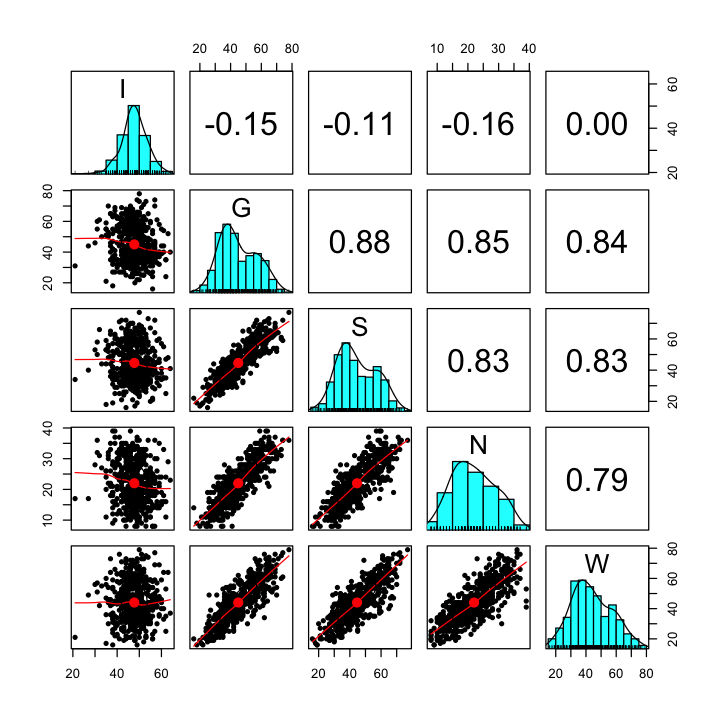

In [14]:
psych::pairs.panels(csq) |>
    print()

La sottoscala di *Internality* è problematica, come messo anche in evidenza dall'autore del test. La consideriamo comunque in questa analisi statistica.

Specifichiamo il modello unifattoriale nella sintassi di `lavaan`:

In [15]:
mod_csq <- "
   F =~ NA*I + G + S + N + W
   F ~~ 1*F
" 

Adattiamo il modello ai dati:

In [16]:
fit <- lavaan:::cfa(
  mod_csq,
  data = csq
)

Esaminiamo i risultati:

In [17]:
summary(
  fit, 
  standardized = TRUE,
  fit.measures = TRUE
) |>
    print()

lavaan 0.6.15 ended normally after 26 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10

  Number of observations                           540

Model Test User Model:
                                                      
  Test statistic                                46.716
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              2361.816
  Degrees of freedom                                10
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.982
  Tucker-Lewis Index (TLI)                       0.965

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -8741.781
  Loglikelihood unrestricted model (H1)      -87

Esaminiamo solo le stime dei parametri del modello:

In [18]:
parameterEstimates(fit) |>
    print()

   lhs op rhs     est    se       z pvalue ci.lower ci.upper
1    F =~   I   0.725 0.253   2.867  0.004    0.229    1.220
2    F =~   G -11.322 0.384 -29.481  0.000  -12.075  -10.569
3    F =~   S -11.342 0.398 -28.513  0.000  -12.122  -10.563
4    F =~   N  -6.163 0.233 -26.398  0.000   -6.621   -5.705
5    F =~   W -11.598 0.444 -26.137  0.000  -12.467  -10.728
6    F ~~   F   1.000 0.000      NA     NA    1.000    1.000
7    I ~~   I  32.840 2.000  16.420  0.000   28.920   36.759
8    G ~~   G  14.038 1.473   9.532  0.000   11.151   16.924
9    S ~~   S  19.508 1.718  11.353  0.000   16.140   22.876
10   N ~~   N   9.847 0.725  13.573  0.000    8.425   11.269
11   W ~~   W  36.892 2.685  13.737  0.000   31.628   42.155


Recuperiamo le specificità:

In [19]:
psi <- parameterEstimates(fit)$est[7:11]
psi |>
    print()

[1] 32.839665 14.037578 19.508119  9.846927 36.891617


Stimiamo l'errore standard della misurazione con la \@ref(eq:err-stnd-meas-FA):

In [20]:
sqrt(sum(psi)) |>
    print()

[1] 10.63597


Applichiamo ora la formula della TCT:

$$
\sigma_E = \sigma_X \sqrt{1 -\rho_{XX^\prime}}.
$$

Per trovare $\sigma$ calcoliamo prima il punteggio totale:


In [21]:
tot_score <- rowSums(csq)

La deviazione standard di `tot_score` ci fornisce una stima di $\sigma_X$:

In [22]:
sigma <- sd(tot_score)
sigma |>
    print()

[1] 41.26414


Per applicare la formula della TCT abbiamo bisogno dell'attendibilità. La stimiamo usando la funzione `reliability` del pacchetto `semTools` dall'oggetto creato da `lavaan:::cfa()`:

In [23]:
rel <- semTools::reliability(fit)
rel |>
    print()

               F
alpha  0.8506572
omega  0.9330313
omega2 0.9330313
omega3 0.9273385
avevar 0.7916575


Utilizzando $\Omega$ otteniamo:

In [24]:
sigma * sqrt(1- rel[2]) |>
    print()

[1] 0.2587831


[1] 10.67846

Si noti come il risultato sia molto simile a quello trovato con la formula della TCT.

### Correlazioni osservate e riprodotte

Le correlazioni riprodotte dal modello si ottengono nel modo seguente dall'oggetto `fit`.

In [25]:
cor_mat <- lavInspect(fit, "cor.ov")
cor_mat |>
    print()

       I      G      S      N      W
I  1.000                            
G -0.119  1.000                     
S -0.117  0.885  1.000              
N -0.112  0.846  0.830  1.000       
W -0.111  0.841  0.825  0.789  1.000


Abbiamo visto come il modello unifattoriale predice che la correlazione tra due variabili manifeste sia il prodotto delle rispettive correlazioni fattoriali. Estraiamo le saturazioni fattoriali.

In [26]:
l <- inspect(fit, what="std")$lambda
l |>
    print()

       F
I  0.126
G -0.949
S -0.932
N -0.891
W -0.886


Per esempio, se consideriamo `I` e `G`, la correlazione predetta dal modello fattoriale tra queste due sottoscale è data dal prodotto delle rispettive saturazioni fattoriali.

In [27]:
l[1] * l[2] |>
    print()

[1] -0.9493687


[1] -0.1191512

La matrice di correlazioni riprodotte riportata sopra mostra il risultato di questo prodotto per ciascuna coppia di variabili manifeste.

In [28]:
l %*% t(l) |> round(3) |>
    print()

       I      G      S      N      W
I  0.016 -0.119 -0.117 -0.112 -0.111
G -0.119  0.901  0.885  0.846  0.841
S -0.117  0.885  0.868  0.830  0.825
N -0.112  0.846  0.830  0.794  0.789
W -0.111  0.841  0.825  0.789  0.785


### Scomposizione della varianza

Consideriamo la variabile manifesta `W`. Calcoliamo la varianza.

In [29]:
var(csq$W) |>
    print()

[1] 171.714


La varianza *riprodotta* di questa variabile, secondo il modello fattoriale, dovrebbe esere uguale alla somma di due componenti: la varianza predetta dall'effetto causale del fattore latente e la varianza residua.  La varianza predetta dall'effetto causale del fattore latente è uguale alla saturazione elevata al quadrato:

In [30]:
(-11.598)^2 

[1] 134.5136

Calcolo ora la proporzione di varianza residua normalizzando rispetto alla varianza osservata (non a quella riprodotta dal modello):

In [31]:
1 - (-11.598)^2 / var(csq$W) |>
    print()

[1] 171.714


[1] 0.2166416

Il valore così ottenuto è molto simile al valore della varianza residua di `W`. 

Ripeto i calcoli per la variabile `G`

In [32]:
1 - (-11.322)^2 / var(csq$G) |>
    print()

[1] 142.4898


[1] 0.1003729

e per la variabile `I`

In [33]:
1 - (0.725)^2 / var(csq$I) |>
    print()

[1] 33.42712


[1] 0.9842755

In tutti i casi, i valori ottenuti sono molto simili alle varianze residue ipotizzate dal modello unifattoriale.

### Correlazione tra variabili manifeste e fattore comune

Un modo per verificare il fatto che, nel modello unifattoriale, la saturazione fattoriale della $i$-esima variabile manifesta è uguale alla correlazione tra i punteggi osservati sulla i$-esima variabile manifesta e il fattore latente è quella di calcolare le correlazioni tra le variabili manifeste e i punteggi fattoriali. I punteggi fattoriali rappresentano una *stima* del punteggio "vero", ovvero del punteggio che ciascun rispondente otterrebbe in assenza di errori di misurazione. Vedremo in seguito come si possono stimare i punteggi fattoriali. Per ora ci limitiamo a calcolarli usando `lavaan`.

In [34]:
head(lavPredict(fit)) |>
    print()

              F
[1,]  0.2693790
[2,] -0.9110820
[3,]  0.1871406
[4,] -0.3315541
[5,]  0.8306627
[6,]  1.1534515


Abbiamo un punteggio diverso per ciascuno dei 540 individui che appartengono al campione di dati esaminato.

In [35]:
dim(lavPredict(fit))

[1] 540   1

Calcoliamo ora le correlazioni tra i valori osservati su ciascuna delle cinque scale del CSQ e le stime dei punteggi veri.

In [36]:
c(
  cor(csq$I, lavPredict(fit)),
  cor(csq$G, lavPredict(fit)),
  cor(csq$S, lavPredict(fit)),
  cor(csq$N, lavPredict(fit)),
  cor(csq$W, lavPredict(fit))
) |> 
  round(3) |>
    print()


[1]  0.128 -0.970 -0.952 -0.910 -0.905


Si noti che i valori ottenui sono molto simili ai valori delle saturazioni fattoriali. La piccola differenza tra le correlazioni ottenute e i valori delle saturazioni fattoriali dipende dal fatto che abbiamo *stimato* i punteggi fattoriali.

In [37]:
inspect(fit, what="std")$lambda |>
    print()

       F
I  0.126
G -0.949
S -0.932
N -0.891
W -0.886
